<a href="https://colab.research.google.com/github/Tomas-Ausensi/Entregables_MAT281/blob/master/docs/projects/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Aplica

##Libraries

In [1]:
# Plotting libraries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
# Scikit learn
import sklearn.preprocessing as skp
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import svm
#Scikit scalers, encoders and transformers
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
# Scikit Metrics
from sklearn.metrics import log_loss, classification_report,roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Scikit pipelines
from sklearn.pipeline import make_pipeline, make_union
from sklearn.pipeline import Pipeline, FeatureUnion
#Scikit Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# Data manipulation libraries
import pandas as pd
import numpy as np
# General use
import os
from tqdm.notebook import tqdm
from joblib import dump, load
import warnings
import xgboost as xgb
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)

In [2]:
#urls
test_url = 'https://raw.githubusercontent.com/Tomas-Ausensi/Entregables_MAT281/master/docs/projects/datasets/test.csv'
train_url = 'https://raw.githubusercontent.com/Tomas-Ausensi/Entregables_MAT281/master/docs/projects/datasets/train.csv'

train_set = pd.read_csv(train_url)
test_set = pd.read_csv(test_url)

##Datasets

Veamos como lucen los datasets. Como ya están separados en train y en test, no es necesario el uso de `train_test_split`, a menos que se separe train en un conjunto de entrenamiento y uno de validación. En este caso, el procedimiento será utilizar **cross validation** para poder obtener una generalización del error de predicción de los modelos escogidos.

In [3]:
train_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


Como se puede apreciar, existen varias columnas de tipo numérico y de tipo categórico. Esto es importante tenerlo en cuenta, pues determinará los encoders/transformers necesarios para el preprocesamiento de los datos.

##Análisis exploratorio de datos

Primero, veamos el porcentaje de datos nulos en cada columna

###Porcentaje de valores nulos

In [7]:
nan_percentage_per_column = (train_set.isna().sum() / len(train_set)) * 100
nan_percentage_per_column

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [8]:
nan_percentage_per_column = (test_set.isna().sum() / len(test_set)) * 100
nan_percentage_per_column

PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
dtype: float64

In [9]:
#len of the datasets
print(f"train_set lenght: {len(train_set)},\n2% is about {int(len(train_set)*0.02)} samples")
print(f"\ntest_set lenght: {len(test_set)},\n2% is about {int(len(test_set)*0.02)} samples")

train_set lenght: 8693,
2% is about 173 samples

test_set lenght: 4277,
2% is about 85 samples


Esta cantidad de ejemplos con datos nulos es considerablemente baja, lo que nos permite utilizar **imputers** en el preprocesamiento sin mayores complicaciones. Para los datos categóricos, se usará la moda; para los numéricos, la desviación estándar.

Ahora, este proceso se incorporará a la *pipeline* posteriormente, quedando en la sección de *modelos*

###Valores de cada columna

Veamos los valores por columna para el train set

In [10]:
for col in train_set.columns:
  print(f"Unique values for the column {col}: {train_set[col].nunique()}")

Unique values for the column PassengerId: 8693
Unique values for the column HomePlanet: 3
Unique values for the column CryoSleep: 2
Unique values for the column Cabin: 6560
Unique values for the column Destination: 3
Unique values for the column Age: 80
Unique values for the column VIP: 2
Unique values for the column RoomService: 1273
Unique values for the column FoodCourt: 1507
Unique values for the column ShoppingMall: 1115
Unique values for the column Spa: 1327
Unique values for the column VRDeck: 1306
Unique values for the column Name: 8473
Unique values for the column Transported: 2


In [11]:
for col in train_set.columns:
  print(f"Unique values for the column {col}: {train_set[col].unique()}")

Unique values for the column PassengerId: ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
Unique values for the column HomePlanet: ['Europa' 'Earth' 'Mars' nan]
Unique values for the column CryoSleep: [False True nan]
Unique values for the column Cabin: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Unique values for the column Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Unique values for the column Age: [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
Unique values for the column VIP: [False True nan]
Unique values for the column RoomService: [   0.  109.   43. ... 1569. 8586.  745.]
Unique values for the column FoodCourt: [   0.    9. 3576. ... 3208. 6819. 

Ahora, lo mismo pero para el test set

In [12]:
for col in test_set.columns:
  print(f"Unique values for the column {col}: {test_set[col].nunique()}")

Unique values for the column PassengerId: 4277
Unique values for the column HomePlanet: 3
Unique values for the column CryoSleep: 2
Unique values for the column Cabin: 3265
Unique values for the column Destination: 3
Unique values for the column Age: 79
Unique values for the column VIP: 2
Unique values for the column RoomService: 842
Unique values for the column FoodCourt: 902
Unique values for the column ShoppingMall: 715
Unique values for the column Spa: 833
Unique values for the column VRDeck: 796
Unique values for the column Name: 4176


In [13]:
for col in test_set.columns:
  print(f"Unique values for the column {col}: {test_set[col].unique()}")

Unique values for the column PassengerId: ['0013_01' '0018_01' '0019_01' ... '9271_01' '9273_01' '9277_01']
Unique values for the column HomePlanet: ['Earth' 'Europa' 'Mars' nan]
Unique values for the column CryoSleep: [True False nan]
Unique values for the column Cabin: ['G/3/S' 'F/4/S' 'C/0/S' ... 'D/296/P' 'D/297/P' 'G/1498/S']
Unique values for the column Destination: ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]
Unique values for the column Age: [27. 19. 31. 38. 20. 21. 23. 24. 45. 44. 46. 29. 40. 30. 14. 66. 36. 18.
 26. 48.  6. 33. nan  1. 17. 34.  5. 22. 16.  7.  2.  0. 56. 39. 35.  8.
  3.  9. 25. 42. 50. 41. 32. 49. 55. 60. 47. 58. 28. 12. 52. 15. 43. 54.
 70. 37. 59. 61. 63. 53.  4. 10. 65. 13. 51. 79. 74. 67. 69. 57. 72. 75.
 11. 73. 71. 64. 62. 78. 77. 68.]
Unique values for the column VIP: [False nan True]
Unique values for the column RoomService: [0.0000e+00 1.0000e+01 3.3900e+02 9.3200e+02 2.0000e+00 2.6000e+01
        nan 3.9000e+01 1.7840e+03 2.9300e+02 5.9800e+02

###train_set2

Uno de los desafíos interesantes que se presentan es la posibilidad de hacer **ingeniería de atributos** sobre las columnas que se nos entregan en los datasets. Por ejemplo, la cardinalidad de cabinas es bastante alta (~6500). Utilizar un encoder como OneHot se vuelve inviable. A pesar de ello, las cabinas poseen subcategorías. Lo que se hará es generar una copia y se trabajará con esta.

In [14]:
train_set2 = train_set.copy()

In [15]:
train_set2[['Deck', 'Num', 'Side']] = train_set2['Cabin'].str.split('/', expand = True)
train_set2 = train_set2.drop('Cabin', axis=1)

In [16]:
train_set2

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


Según la información disponible en Kaggle:
- Deck es la cubierta donde se halla la cabina
- Num es el número de la cabina
- Side puede corresponder a Babor (P, Port) o Estribor (S, Starboard)

In [17]:
for col in ['Deck', 'Num', 'Side']:
  print(f"Unique values in {col}: {train_set2[col].nunique()}")

Unique values in Deck: 8
Unique values in Num: 1817
Unique values in Side: 2


De esa forma, la cardinalidad de la columna baja considerablemente. Podemos aplicar OneHot a Deck y a Side. Para num, quizás el número no entregue información tan relevante como si puede ser Deck o Side. Podría ser descartada u otro encoder puede ser utilizado, como TargetEncoder, debido a su alta cardinalidad.

Por otro lado, un procedimiento similar se puede hacer para la columna `PassengerId`, debido a que los primeros dígitos corresponden a un grupo, y los siguientes dos corresponden al número del individuo dentro de ese grupo. Sin embargo, solo se propone como idea, no será llevado a cabo.

Por último, se utilizará esa columna como índice y se droppeará el nombre, pues es un dato único para cada ejemplo: no podemos obtener información relevante de él. Lo mismo para el número de la cabina

In [18]:
index_column = train_set2['PassengerId']
train_set2.index = index_column
train_set2 = train_set2.drop(['PassengerId', 'Name', 'Num'], axis = 1)


In [19]:
train_set2

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S


###Visualizaciones

####Columnas numéricas y categóricas

Se definen las columnas categóricas y numércias

In [20]:
categorical_cols = [col for col in train_set2.columns
                    if train_set2[col].dtype == 'object']

numerical_cols = [col for col in train_set2.columns
                  if train_set2[col].dtype in ['int64', 'float64']
                  and col != 'Transported']

target = train_set2['Transported']

In [21]:
print(categorical_cols)
print(numerical_cols)

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


Como se pudo observar antes, la cardinalidad de todas las columnas categóricas es baja. Por ende, se pueden visualizar sin problemas mediante algunos tipos de gráficos

####Visualizaciones categóricos

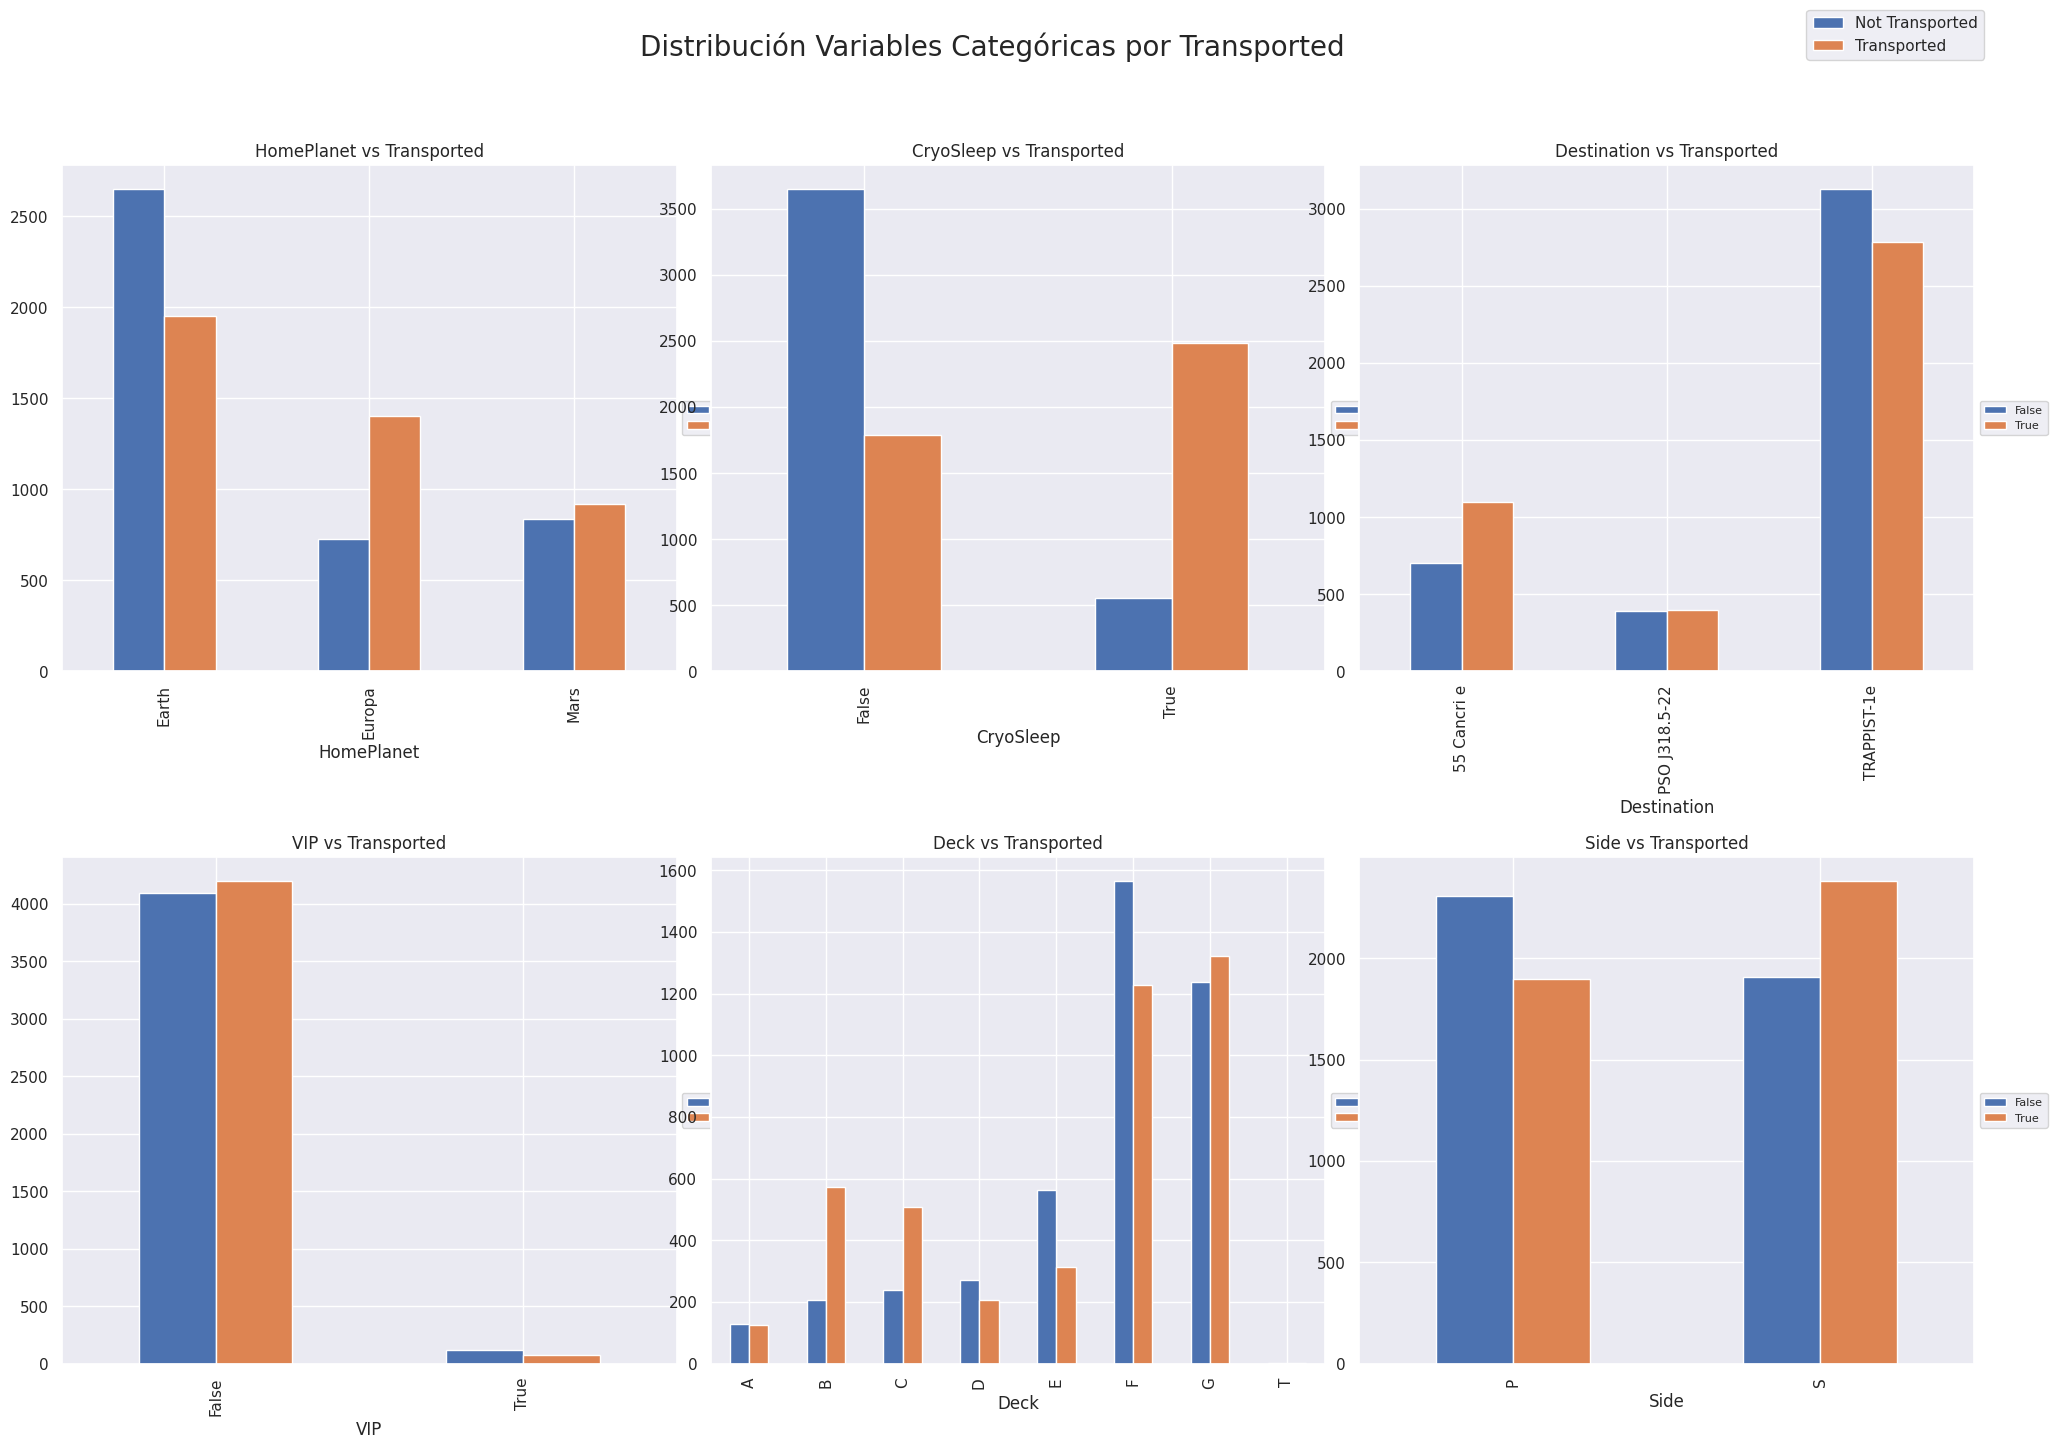

In [22]:
fig, axes = plt.subplots(figsize=(20,15), nrows=2, ncols=3)
fig.suptitle('Distribución Variables Categóricas por Transported', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
for i, column in enumerate(categorical_cols):
  df_gb = train_set2.groupby([column, 'Transported']).size().unstack(level=1)
  df_gb.plot(kind='bar', ax=axes[i//3, i%3])
  box = axes[i//3, i%3].get_position()
  axes[i//3, i%3].set_position([box.x0, box.y0, box.width * 0.8, box.height])
  axes[i//3, i%3].legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 8})
  axes[i//3,i%3].set_title(f'{column} vs Transported')

legend_labels = ['Not Transported', 'Transported']
fig.legend(legend_labels, loc='upper right', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

De esta visualización se pueden obtener información interesante. Por ejemplo, para el caso de la columna VIP, hay un gran desbalance de datos. Por otro lado, si el pasajero es del deck B, entonces hay una probabilidad alta de quehaya sido transportado. Si el pasajero iba en Cryosleep, entonces es probable de que haya sido transportado y así sucesivamente.

####Visualizaciones numéricos

#####Histplots

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

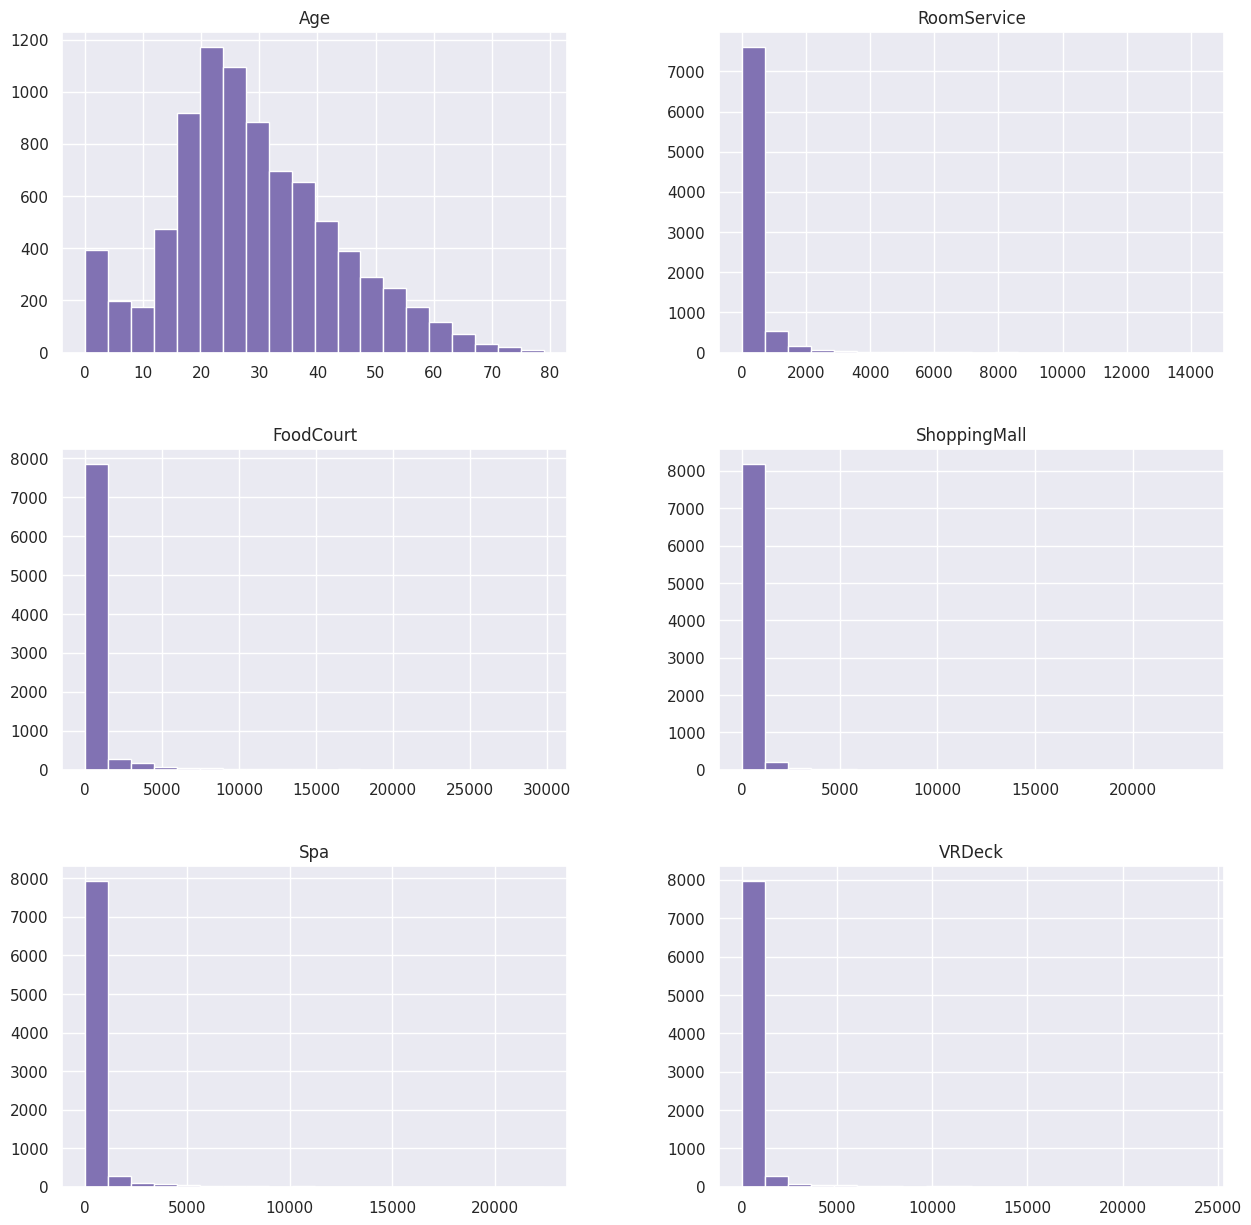

In [23]:
train_set2[numerical_cols].hist(figsize=(15, 15), bins=20, color = 'm')

#####Distplots

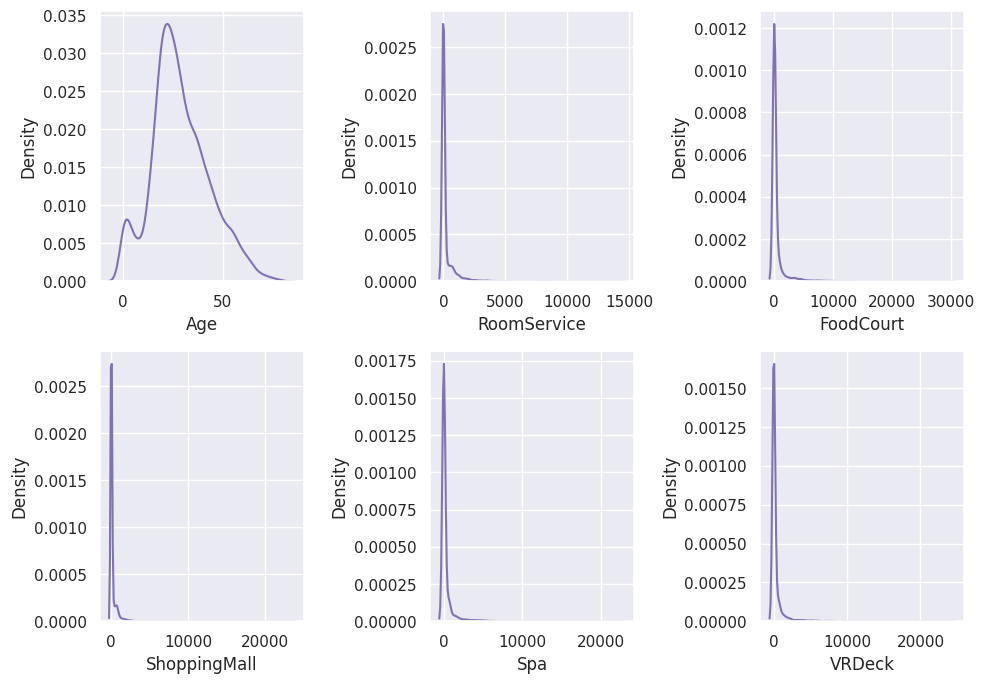

In [24]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10,7))
for index, col in enumerate(numerical_cols):
  sns.distplot(
      train_set2[col],
      hist=False,
      rug=False,
      kde=True,
      bins=120,
      ax = axes[index//3, index%3],
      color = 'm')
  axes[index//3,index%3].grid(True)
plt.tight_layout()
plt.show()

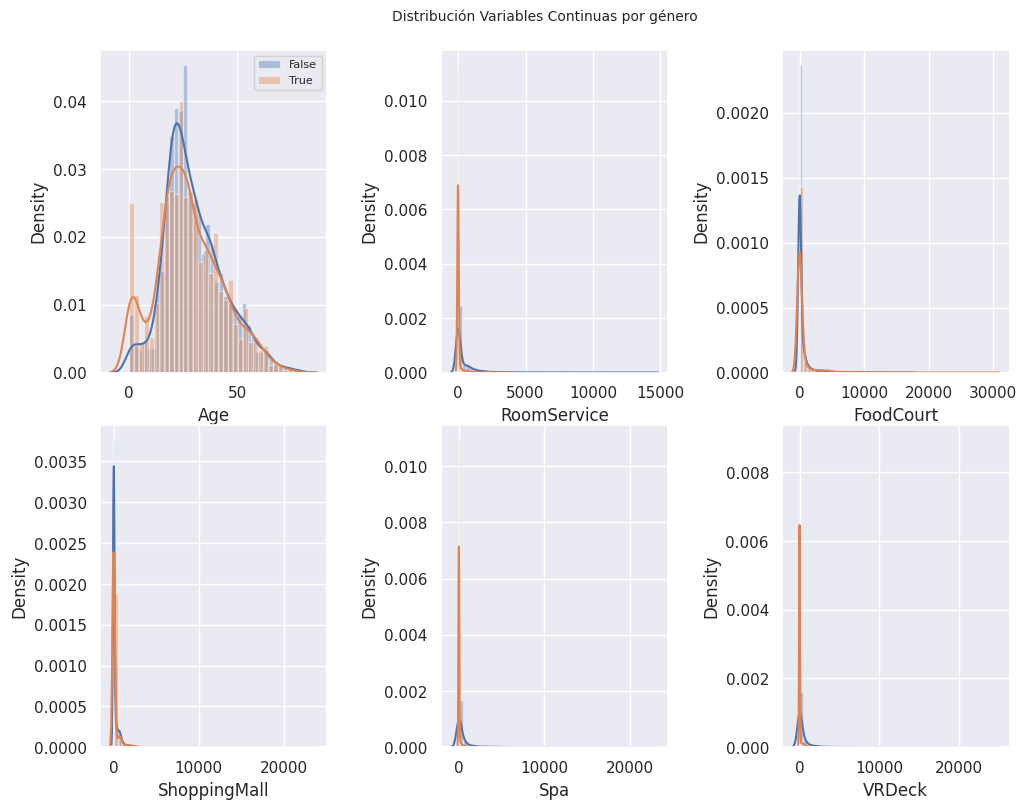

In [25]:
fig, axes = plt.subplots(figsize=(10,8), nrows=2, ncols=3)
fig.suptitle('Distribución Variables Continuas por género', fontsize=10)
fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
for i, column in enumerate(numerical_cols):
    for transported in train_set2['Transported'].unique():
      target = train_set2.loc[train_set2['Transported'] == transported]
      sns.distplot(target[column], hist=True, rug=False, kde=True,
                   ax=axes[i//3,i%3], label=transported)
      if i==0:
        axes[0,0].legend(prop={'size': 8})


#axes[-1,-2].axis('off')
plt.show()

####Barplots

Ahora, podemos ver algunos barplots para ver posibles outliers en los datos continuos

<Axes: >

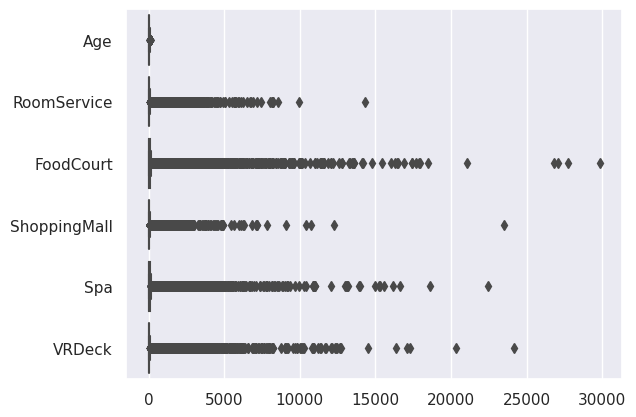

In [26]:
sns.boxplot(train_set2[numerical_cols], orient = 'h')

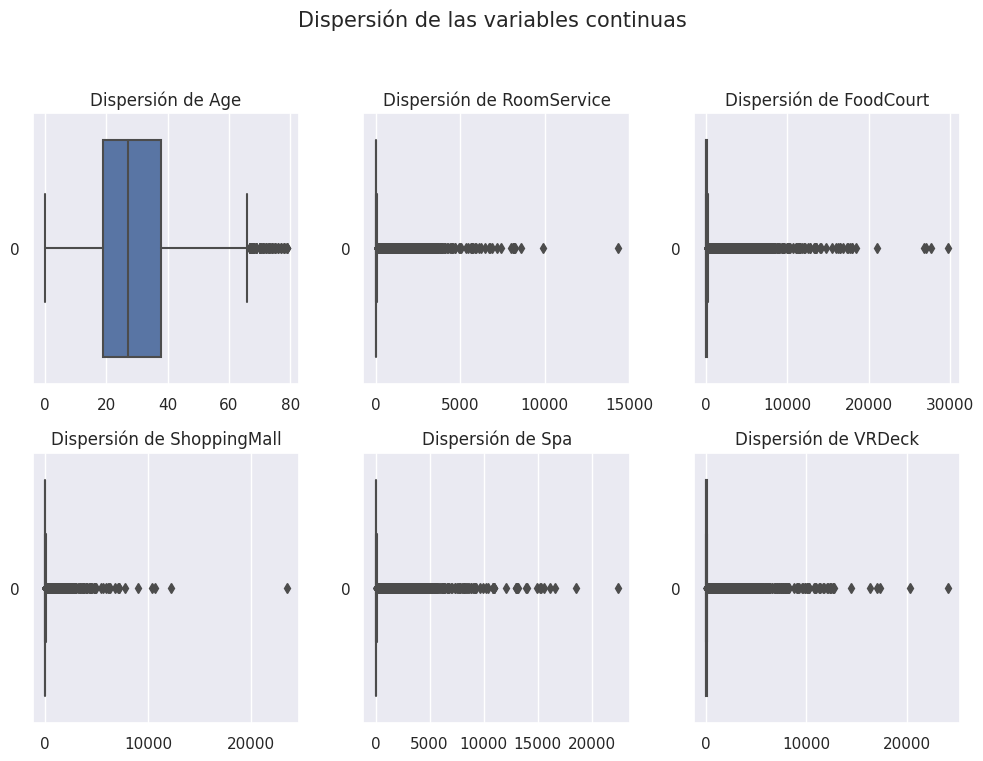

In [27]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10,8))
for i, col in enumerate(numerical_cols):
  sns.boxplot(train_set2[col], orient = 'h', ax = axes[i//3, i%3])
  axes[i//3, i%3].set_title(f"Dispersión de {col}")
fig.tight_layout()
fig.suptitle("Dispersión de las variables continuas", fontsize = 15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##Imputers, Encoders y Transformers

Ahora, la gracia será definir los imputers, encoders y transformers para conformar la primera parte de la Pipeline: el preprocesador.
La ventaja acá es que no tenemos columnas categóricas de alta cardinalidad. Sin embargo, se puede utilizar Ordinal Encoder, por ejemplo, en la columna Deck, pues hay un orden inherente a los valores. Para otras columnas, como Side y Vip, se puede utilizar OneHot con el parámetro `drop = 'if binary'` para quedarnos con solo una columna y no quedar con información abundante.

Por ende, la configuración va a ser la siguiente:
- columnas OneHot: HomePlanet, CryoSleep, Destination, VIP, Side
- Columnes Ordinal: Deck


In [28]:
categorical_cols_ohe = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Side']
categorical_cols_oe = ['Deck']

Por ende, las columans son:

In [29]:
print(categorical_cols_ohe)
print(categorical_cols_oe)
print(numerical_cols)

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Side']
['Deck']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


Una última cosa a tener en cuenta:

In [30]:
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors = 10, weights = 'distance')),
    ('scaler', StandardScaler())
])

categorical_transformer_ohe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(drop = 'if_binary'))
])

categorical_transformer_oe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
     ('encoder', OrdinalEncoder()),
])

label_encoder = LabelEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, numerical_cols),
        ('categorical_ohe', categorical_transformer_ohe, categorical_cols_ohe),
        ('categorical_te', categorical_transformer_oe, categorical_cols_oe)
    ],
    remainder = 'passthrough', verbose_feature_names_out = False
)

###LabelEncoder

Antes de separar los datos, se convierte la columna target (Transported en este caso) a numérico mediante LabelEncoder

In [31]:
train_set2['Transported'] = label_encoder.fit_transform(train_set2['Transported'])

In [32]:
train_set2['Transported']

PassengerId
0001_01    0
0002_01    1
0003_01    0
0003_02    0
0004_01    1
          ..
9276_01    0
9278_01    0
9279_01    1
9280_01    0
9280_02    1
Name: Transported, Length: 8693, dtype: int64

El mappeo respectivo es el siguiente:

In [33]:
le_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
le_mapping

{False: 0, True: 1}

###Data split

In [34]:
X_train = train_set2.drop('Transported', axis = 1)
y_train = train_set2['Transported']


##Model Selection

In [35]:
models = [
    ('LogisticRegression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('RandomForest', RandomForestClassifier(criterion = 'entropy')),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('XGBoost', xgb.XGBClassifier(objective='binary:logistic', random_state=42)),
    ('AdaBoost', AdaBoostClassifier())
]

In [36]:
param_grids = {
    'LogisticRegression' : {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'saga']
},
    'KNN' : {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'model__p': [1, 2]
},
    'RandomForest' : {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
},
    'GradientBoosting' : {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
},
    'XGBoost' : {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5],
    'model__min_child_weight': [1, 3, 5],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0]
},
    'AdaBoost' : {
    'model__base_estimator': [SVC(kernel = 'linear'), DecisionTreeClassifier(criterion = 'entropy')],
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2]
}
}

In [37]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
}

In [38]:
results_df = pd.DataFrame(columns=['Model'] + list(scoring.keys()))
best_models = {}
for model_name, model in models:
    pipeline = Pipeline([
        ('preprocesor', preprocessor),
        ('model', model)
    ])
    grid_search = RandomizedSearchCV(pipeline, param_grids[model_name], scoring='accuracy', cv=5, verbose = 4)
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_


    cv_results = cross_validate(grid_search.best_estimator_, X_train, y_train, cv=5, scoring=scoring)

    results_df = results_df.append({
      'Model': model_name,
      **{metric: cv_results[f'test_{metric}'].mean() for metric in scoring}
    }, ignore_index=True)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END model__C=0.001, model__penalty=l2, model__solver=saga;, score=0.760 total time=   1.5s
[CV 2/5] END model__C=0.001, model__penalty=l2, model__solver=saga;, score=0.783 total time=   1.2s
[CV 3/5] END model__C=0.001, model__penalty=l2, model__solver=saga;, score=0.763 total time=   1.3s
[CV 4/5] END model__C=0.001, model__penalty=l2, model__solver=saga;, score=0.762 total time=   1.3s
[CV 5/5] END model__C=0.001, model__penalty=l2, model__solver=saga;, score=0.801 total time=   1.0s
[CV 1/5] END model__C=0.1, model__penalty=l2, model__solver=liblinear;, score=0.775 total time=   1.0s
[CV 2/5] END model__C=0.1, model__penalty=l2, model__solver=liblinear;, score=0.783 total time=   0.6s
[CV 3/5] END model__C=0.1, model__penalty=l2, model__solver=liblinear;, score=0.792 total time=   0.6s
[CV 4/5] END model__C=0.1, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   0.6s
[CV 5/5] END model__C=0.1, 

In [39]:
results_df

,Model,accuracy,precision,recall,f1
0,LogisticRegression,0.790178,0.791651,0.790178,0.789862
1,KNN,0.777639,0.778905,0.777639,0.777396
2,RandomForest,0.800072,0.801034,0.800072,0.799873
3,GradientBoosting,0.799152,0.800929,0.799152,0.798778
4,XGBoost,0.802373,0.804585,0.802373,0.801923
5,AdaBoost,0.753136,0.753759,0.753136,0.752938


##Test set

In [40]:
test_set2 = test_set.copy()

In [41]:
test_set2[['Deck', 'Num', 'Side']] = test_set2['Cabin'].str.split('/', expand = True)
test_set2 = test_set2.drop('Cabin', axis=1)
index_column = test_set2['PassengerId']
test_set2.index = index_column
test_set2 = test_set2.drop(['PassengerId', 'Name', 'Num'], axis = 1)

In [42]:
test_set2

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S
0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S
0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,S
0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,S
0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,S
9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,NaN
9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,D,P


In [43]:
clf = best_models['XGBoost']
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocesor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=10,
                                                                              weights='distance')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('categorical_ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_freque...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=50,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [44]:
y_pred = clf.predict(test_set2)
mapping = {1 : True , 0 : False}

In [45]:
data = pd.DataFrame(y_pred, index = index_column)
data.rename(columns = {0 : 'Transported'}, inplace = True)
data.index.name = 'PassengerId'
data['Transported'] = data['Transported'].map(mapping)
data

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [46]:
len(data)

4277

In [48]:
"""
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)
"""

"\nfrom google.colab import drive\ndrive.flush_and_unmount()\ndrive.mount('/content/drive', force_remount=True)\n"

In [49]:
"""
csv_file_path = os.path.join('/content/drive/MyDrive/Machine Learning', 'titanic1.csv')
data.to_csv(csv_file_path)
"""

"\ncsv_file_path = os.path.join('/content/drive/MyDrive/Machine Learning', 'titanic1.csv')\ndata.to_csv(csv_file_path)\n"

##Visualizaciones

In [50]:
models_names = ['LogisticRegression', 'KNN', 'RandomForest', 'GradientBoosting',
                'XGBoost', 'AdaBoost']
"""
models = [
    ('LogisticRegression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('RandomForest', RandomForestClassifier(criterion = 'entropy')),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('XGBoost', xgb.XGBClassifier(objective='binary:logistic', random_state=42)),
    ('AdaBoost', AdaBoostClassifier())
]
"""

"\nmodels = [\n    ('LogisticRegression', LogisticRegression()),\n    ('KNN', KNeighborsClassifier()),\n    ('RandomForest', RandomForestClassifier(criterion = 'entropy')),\n    ('GradientBoosting', GradientBoostingClassifier()),\n    ('XGBoost', xgb.XGBClassifier(objective='binary:logistic', random_state=42)),\n    ('AdaBoost', AdaBoostClassifier())\n]\n"

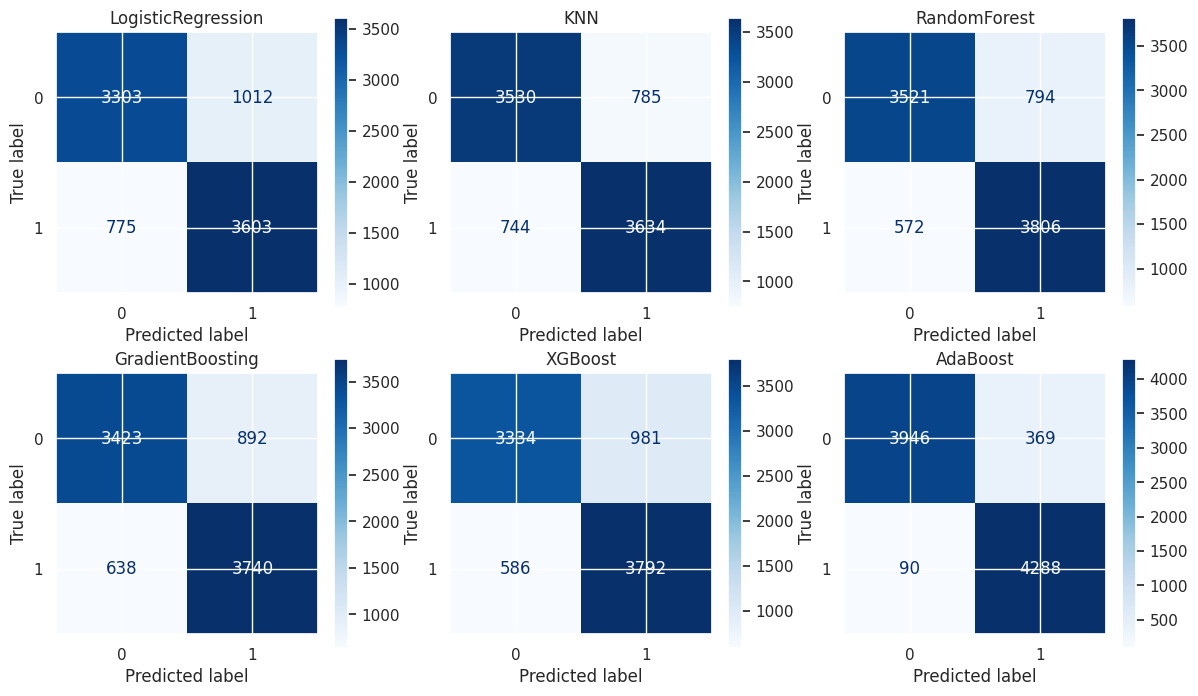

In [51]:
fig, axes = plt.subplots(figsize=(12,7), nrows = 2, ncols = 3)
fig.tight_layout()
for index, model_name in enumerate(models_names):
  cm = confusion_matrix(y_train, best_models[model_name].predict(X_train))
  axes[index//3, index%3].set_title(f'{model_name}')
  disp = ConfusionMatrixDisplay(confusion_matrix = cm)
  disp.plot(cmap = 'Blues', ax = axes[index//3, index%3])